In [113]:
import xarray as xr
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np

from src.helper_functions import calculate_time

pd.set_option('display.max_rows', 500)

In [117]:
def stack_year_month_day(ds):
    ds_stacked = ds.stack(time=("Year", "Month", "Day"))
    ds_stacked = ds_stacked.dropna('time', how='all')

    time_coord = []
    for i in ds_stacked.time.data:
        y,m,d = i
        calctime = datetime.datetime(year=int(y), month=int(m), day=int(d))
        time_coord.append(calctime)

    ds_stacked = ds_stacked.assign_coords({'newtime':("time", time_coord)})
    ds_stacked = ds_stacked.swap_dims({'time': 'newtime'})
    # ds_stacked = ds_stacked.drop('time')
    ds_stacked = ds_stacked.rename({'time':'time(y,m,d)'})
    ds_stacked = ds_stacked.rename({'newtime':'time'})

    return(ds_stacked)

In [118]:
base_path = '/home/jez/Bias_Correction/'
path = f'{base_path}data/ProcessedData/NST_Observations.nc'
subset_path = f'{base_path}data/ProcessedData/NST_Observations_Subset.nc'
ds = xr.load_dataset(path)
ds_subset = xr.load_dataset(subset_path)

In [119]:
ds_stacked = stack_year_month_day(ds)
ds_subset_stacked = stack_year_month_day(ds_subset)

In [5]:
df = ds_stacked.to_dataframe()
df = df.dropna()
df_summary = df.groupby(['Station_Lower','Year']).describe().T
df_summary.loc[(('Temperature()'), ('count','mean','min','max')), :].T.head(500)

Temperature()                                 
                               count       mean        min        max
Station_Lower   Year                                                 
a028            1985.0         255.0 -29.725740 -48.408333 -10.546667
                1986.0          45.0 -13.797540 -20.842000  -7.675000
a028-a          1986.0         144.0 -21.928492 -41.340001  -9.786667
                1987.0         351.0 -26.057005 -58.533750  -7.598333
                1988.0         347.0 -27.656475 -49.302857  -9.694167
                1989.0         357.0 -26.704607 -49.488000  -4.867500
                1990.0         119.0 -23.170231 -45.840000  -8.155000
a028-b          1998.0          55.0 -16.246344 -27.735000  -8.800000
                1999.0         364.0 -29.336679 -51.580000 -10.253333
                2000.0         365.0 -26.492514 -47.423333  -9.600000
                2001.0         353.0 -26.095545 -45.120000  -7.480000
                2002.0         365.0 -24.993787 -31.793333 -12.893333
                2003.0         361.0 -27.147752 -34.620000 -18.454286
                2004.0         364.0 -25.996052 -30.260000 -18.730000
                2005.0         210.0 -24.397912 -29.040000 -20.680000
ago-4           2013.0         365.0 -51.687385 -75.025000 -27.614286
                2014.0         364.0 -52.423398 -74.225000 -25.157143
                2015.0         365.0 -52.935350 -75.912500 -25.683333
                2016.0         366.0 -53.056731 -76.837500 -26.737500
                2017.0         365.0 -53.380148 -77.912500 -23.700000
                2018.0         364.0 -51.018190 -77.225000 -19.837500
                2019.0         356.0 -53.252747 -75.912500 -26.866667
                2020.0         365.0 -51.892386 -74.775000 -25.987500
                2021.0          90.0 -43.612040 -61.962500 -27.314286
ago-5           2020.0         207.0 -56.934064 -76.487500 -27.925000
ago-a81         1993.0         352.0 -42.113809 -71.450000 -17.366667
ago-a84         1996.0         284.0 -36.147487 -58.875000 -12.166667
                1997.0          80.0 -27.632583 -45.850000 -13.200000
                1998.0           3.0 -39.083333 -40.500000 -36.400000
ago-site        1991.0         337.0 -25.586640 -43.375000  -5.850000
                1992.0         363.0 -26.175405 -48.600000  -7.637500
alessandra      1987.0         230.0 -13.724145 -30.112500  -0.142857
                1988.0         268.0 -11.778904 -23.466667   0.157143
                1989.0         365.0 -15.494714 -32.871429   1.325000
                1990.0         352.0 -15.699473 -34.142857   2.462500
                1991.0         365.0 -14.632679 -30.975000   1.612500
                1992.0         365.0 -15.442962 -37.125000   2.128571
                1993.0         365.0 -16.340365 -36.687500   2.700000
                1994.0         365.0 -16.958465 -36.037500  -1.042857
                1995.0         365.0 -16.172321 -34.200000   2.200000
                1996.0         366.0 -15.069458 -32.612500   1.287500
                1997.0         334.0 -16.173112 -29.933333   0.337500
                1998.0         350.0 -16.244209 -32.987500   0.728571
                1999.0         365.0 -15.649196 -35.071429   0.837500
                2000.0         365.0 -15.713670 -31.925000  -1.775000
                2001.0         365.0 -16.282460 -34.457143   3.087500
                2002.0         365.0 -16.070507 -35.900000   5.937500
                2003.0         365.0 -16.029256 -31.137500   0.950000
                2004.0         366.0 -16.588415 -37.787500   1.571429
                2005.0         365.0 -15.495639 -32.037500   1.857143
                2006.0         365.0 -16.324678 -34.637500   1.442857
                2007.0         365.0 -14.700550 -31.137500   2.475000
                2008.0         365.0 -15.954133 -35.837500   1.600000
                2009.0         365.0 -15.349971 -32.800000   1.462500
                2010.0         36

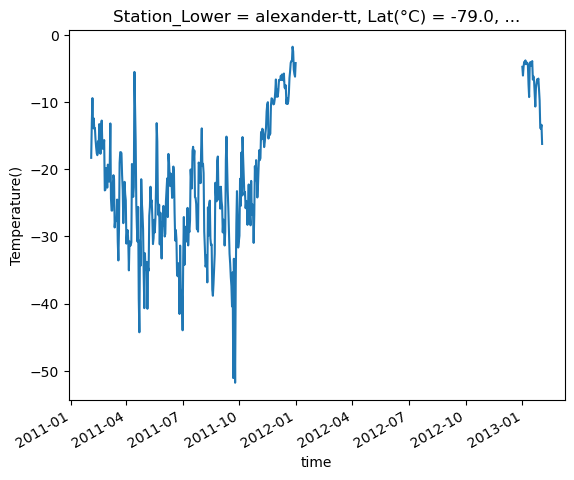

In [84]:
ds_stacked['Temperature()'].sel(Station_Lower='alexander-tt').plot()

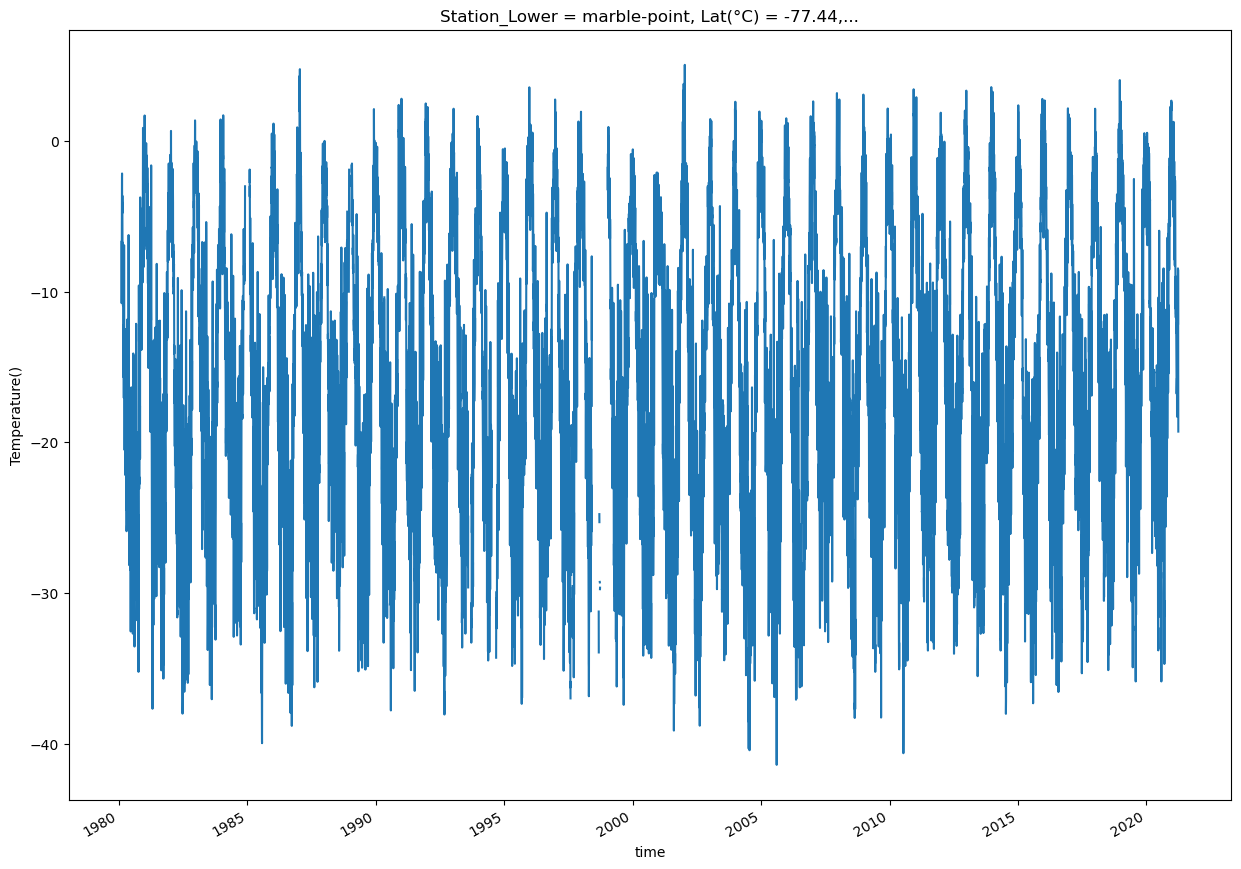

In [150]:
ds_subset_max_stacked = ds_subset_stacked.isel(Station_Lower = ds_subset_stacked['Temperature()'].count('time').argmax())
ds_subset_max_stacked['Temperature()'].plot(figsize=(15,10))

In [234]:
# test = ds_subset_max_stacked.copy()
test = ds_subset_stacked.copy()

test = test.swap_dims({'time': 'time(y,m,d)'})
test = test.unstack()
test = test.sel(Month=1)
test = test.stack(YearDay = ['Year','Day'])
test = test['Temperature()']
label = [f'Year={int(year)},DoM={int(dom)}' for year,dom in list(zip(test.Year.values,test.Day.values))]
test = test.assign_coords({'xlabel':("YearDay", label)})

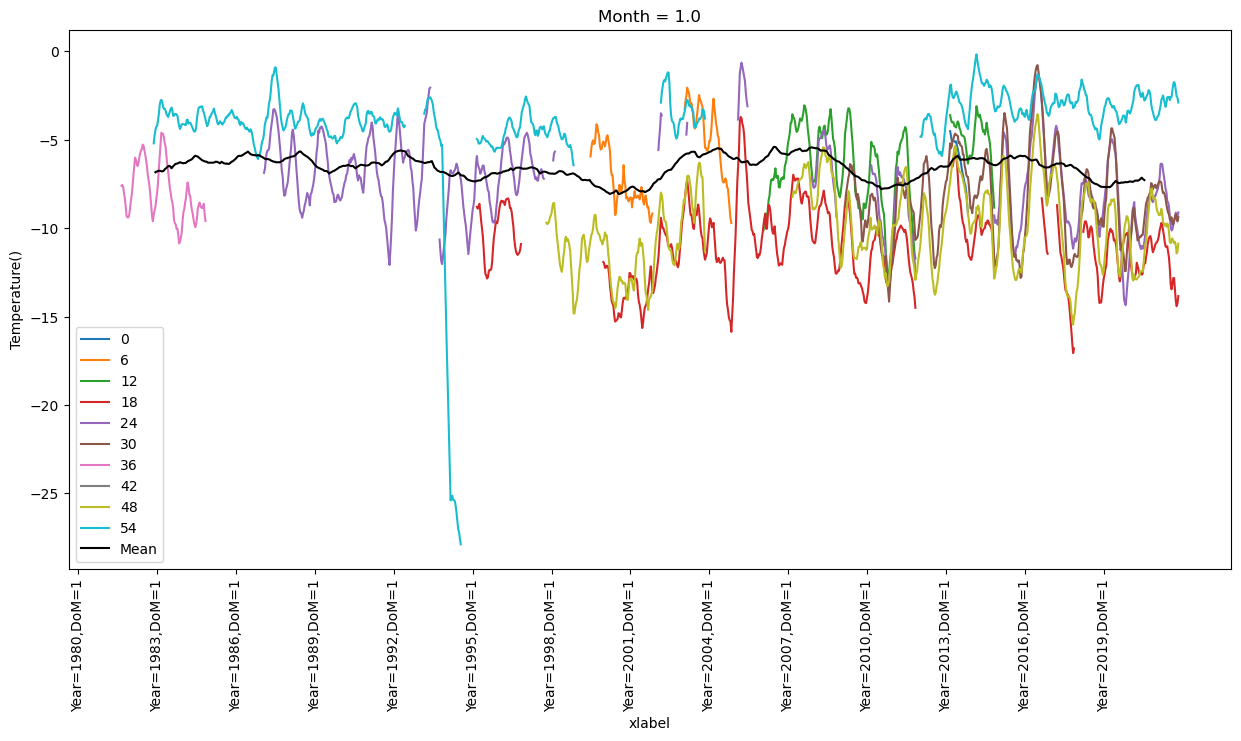

In [282]:
days_in_month = test.Day.max().data
# test.plot(x='xlabel',xticks=np.arange(0,len(test),days_in_month*3),figsize=(15,7))

fig, axs = plt.subplots(1,1,figsize=(15,7))

test_mean = test.mean('Station_Lower')
test_mean_smoothed = test_mean.rolling(YearDay=90, center=True).mean()
test_smoothed = test.rolling(YearDay=10, center=True).mean()

for i in np.arange(0,len(test.Station_Lower),6):
    # test.isel(Station_Lower=i).plot.line(x='xlabel',xticks=np.arange(0,len(test.YearDay),days_in_month*3),ax=axs)
    test_smoothed.isel(Station_Lower=i).plot.line(x='xlabel',xticks=np.arange(0,len(test.YearDay),days_in_month*3),ax=axs,label=i)

test_mean_smoothed.plot.line(x='xlabel',xticks=np.arange(0,len(test.YearDay),days_in_month*3),ax=axs,label='Mean',color='k')

plt.xticks(rotation=90)
plt.legend()
plt.show()